<a href="https://colab.research.google.com/github/soroor-ag/Spam-SMS-NaiveBayes-Project/blob/main/bayesian_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import dataset

In [ ]:
https://drive.google.com/file/d/1pyKkx4skyjuxfj3UdSDje0dPyCCf0NPA/view?usp=sharing

In [ ]:
!gdown 1pyKkx4skyjuxfj3UdSDje0dPyCCf0NPA

Downloading...
From: https://drive.google.com/uc?id=1pyKkx4skyjuxfj3UdSDje0dPyCCf0NPA
To: /content/spam.csv
100% 504k/504k [00:00<00:00, 119MB/s]


In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)


In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
  # Rename the columns name
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [ ]:
df

,target,text,message_length,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [ ]:
df['target'] = df['target'].map({'ham': 0, 'spam': 1})


In [ ]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
#checking missing values
df.isnull().sum()


,0
target,0
text,0


In [ ]:
#check duplicate values
df.duplicated().sum()

np.int64(403)

In [ ]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.shape

(5169, 2)

In [ ]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


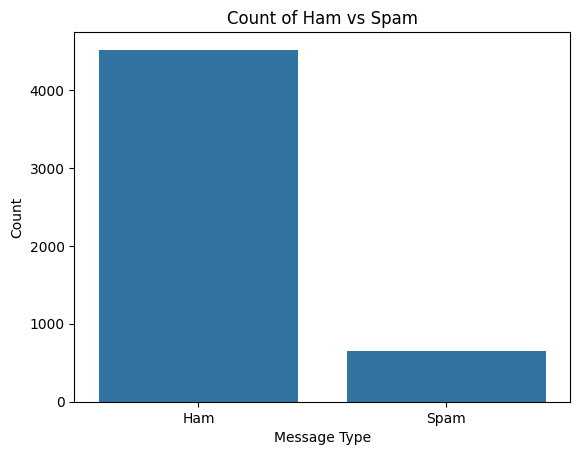

In [ ]:

sns.countplot(data=df, x='target')
plt.title('Count of Ham vs Spam')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()


<ipython-input-37-9a75778e2db7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_length'] = df['text'].apply(len)


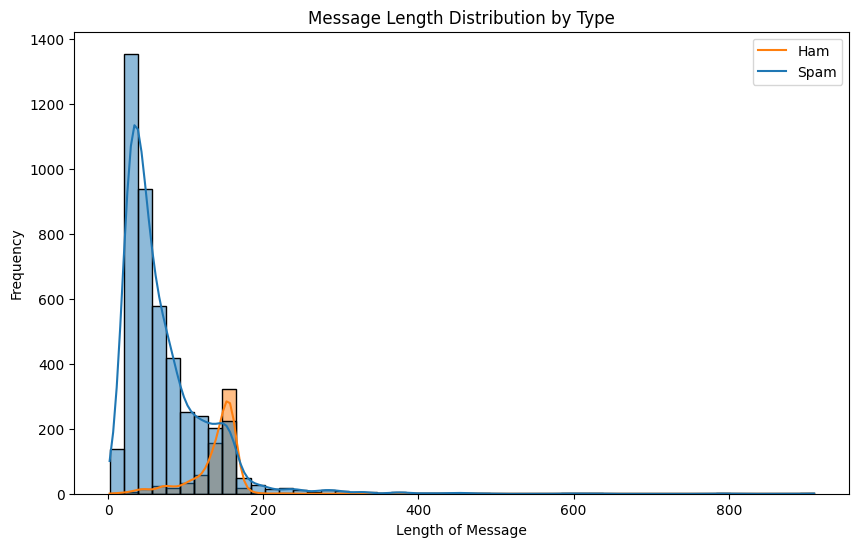

In [ ]:
df['message_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='target', bins=50, kde=True)
plt.title('Message Length Distribution by Type')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.legend(labels=['Ham', 'Spam'])
plt.show()


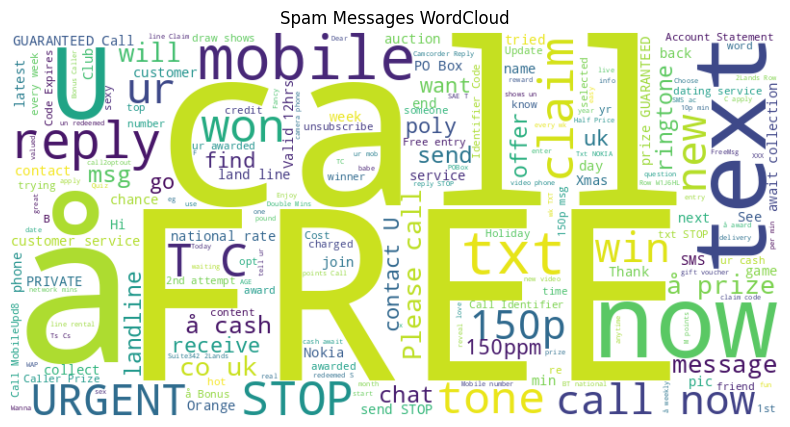

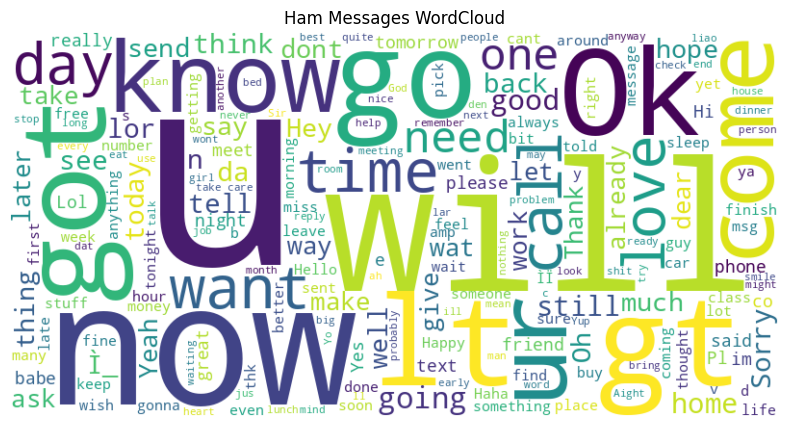

In [ ]:
from wordcloud import WordCloud

spam_words = ' '.join(df[df['target'] == 1]['text'])
ham_words = ' '.join(df[df['target'] == 0]['text'])

# Spam
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages WordCloud')
plt.show()

# Ham
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Messages WordCloud')
plt.show()


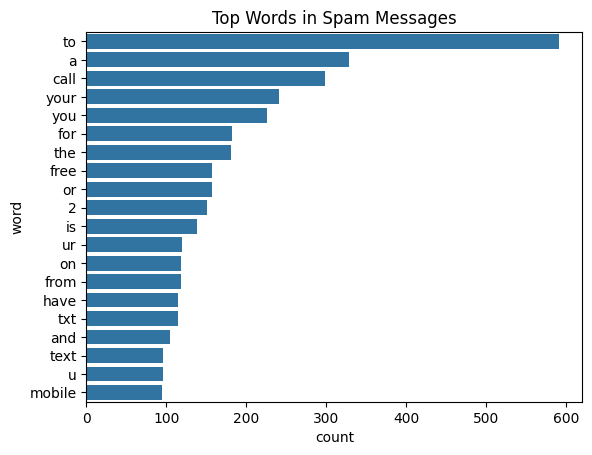

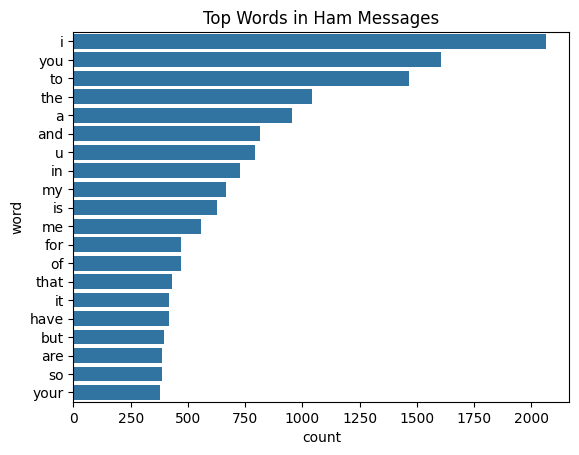

In [ ]:
from collections import Counter
import pandas as pd

def get_top_n_words(messages, n=20):
    words = ' '.join(messages).lower().split()
    common_words = Counter(words).most_common(n)
    return pd.DataFrame(common_words, columns=['word', 'count'])

# Top spam words
top_spam = get_top_n_words(df[df['target'] == 1]['text'])
sns.barplot(data=top_spam, x='count', y='word')
plt.title('Top Words in Spam Messages')
plt.show()

# Top ham words
top_ham = get_top_n_words(df[df['target'] == 0]['text'])
sns.barplot(data=top_ham, x='count', y='word')
plt.title('Top Words in Ham Messages')
plt.show()


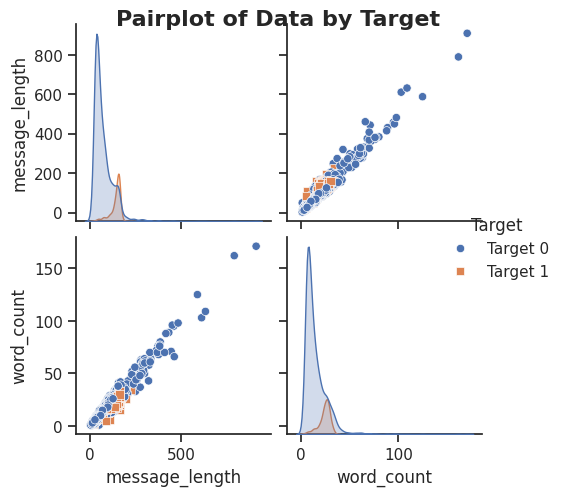

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

# bayesian classification

## part1

##part2

## part3

In [ ]:
class MultiNB:
    def __init__(self,alpha=1):
        self.alpha = alpha

    def _prior(self): # CHECKED
        """
        Calculates prior for each unique class in y. P(y)
        """
        P = np.zeros((self.n_classes_))
        _, self.dist = np.unique(self.y,return_counts=True)
        for i in range(self.classes_.shape[0]):
            P[i] = self.dist[i] / self.n_samples
        return P

    def fit(self, X, y): # CHECKED, matches with sklearn
        """
        Calculates the following things-
            class_priors_ is list of priors for each y.
            N_yi: 2D array. Contains for each class in y, the number of time each feature i appears under y.
            N_y: 1D array. Contains for each class in y, the number of all features appear under y.

        params
        ------
        X: 2D array. shape(n_samples, n_features)
            Multinomial data
        y: 1D array. shape(n_samples,). Labels must be encoded to integers.
        """
        self.y = y
        self.n_samples, self.n_features = X.shape
        self.classes_ = np.unique(y)
        self.n_classes_ = self.classes_.shape[0]
        self.class_priors_ = self._prior()

        # distinct values in each features
        self.uniques = []
        for i in range(self.n_features):
            tmp = np.unique(X[:,i])
            self.uniques.append( tmp )

        self.N_yi = np.zeros((self.n_classes_, self.n_features)) # feature count
        self.N_y = np.zeros((self.n_classes_)) # total count
        for i in self.classes_: # x axis
            indices = np.argwhere(self.y==i).flatten()
            columnwise_sum = []
            for j in range(self.n_features): # y axis
                columnwise_sum.append(np.sum(X[indices,j]))

            self.N_yi[i] = columnwise_sum # 2d
            self.N_y[i] = np.sum(columnwise_sum) # 1d

    def _theta(self, x_i, i, h):
        """
        Calculates theta_yi. aka P(xi | y) using eqn(1) in the notebook.

        params
        ------
        x_i: int.
            feature x_i

        i: int.
            feature index.

        h: int or string.
            a class in y

        returns
        -------
        theta_yi: P(xi | y)
        """

        Nyi = self.N_yi[h,i]
        Ny  = self.N_y[h]

        numerator = Nyi + self.alpha
        denominator = Ny + (self.alpha * self.n_features)

        return  (numerator / denominator)**x_i

    def _likelyhood(self, x, h):
        """
        Calculates P(E|H) = P(E1|H) * P(E2|H) .. * P(En|H).

        params
        ------
        x: array. shape(n_features,)
            a row of data.
        h: int.
            a class in y
        """
        tmp = []
        for i in range(x.shape[0]):
            tmp.append(self._theta(x[i], i,h))

        return np.prod(tmp)

    def predict(self, X):
        samples, features = X.shape
        self.predict_proba = np.zeros((samples,self.n_classes_))

        for i in range(X.shape[0]):
            joint_likelyhood = np.zeros((self.n_classes_))

            for h in range(self.n_classes_):
                joint_likelyhood[h]  = self.class_priors_[h] * self._likelyhood(X[i],h) # P(y) P(X|y)

            denominator = np.sum(joint_likelyhood)

            for h in range(self.n_classes_):
                numerator = joint_likelyhood[h]
                self.predict_proba[i,h] = (numerator / denominator)

        indices = np.argmax(self.predict_proba,axis=1)
        return self.classes_[indices]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score



# Step 3: Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['text'], df['target'], test_size=0.2, random_state=42
)

# Step 4: Convert text to numeric features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_text).toarray()
X_test = vectorizer.transform(X_test_text).toarray()

# Step 5: Fit the custom MultiNB model
nb = MultiNB(alpha=1)
nb.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = nb.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['ham', 'spam']))


Accuracy: 0.9854932301740812

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Train model
sklearn_clf = MultinomialNB()
sklearn_clf.fit(X_train, y_train)
y_pred = sklearn_clf.predict(X_test)

# Report
print("Scikit-learn MultinomialNB classification report:")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))


Scikit-learn MultinomialNB classification report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9854932301740812
